In [1]:
import tensorflow as tf

/home/phunc20/.config/miniconda3/envs/homl1e/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/phunc20/.config/miniconda3/envs/homl1e/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/phunc20/.config/miniconda3/envs/homl1e/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/phunc20/.c

In [104]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
learning_rate = 0.001

In [105]:
tf.reset_default_graph()

In [106]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [107]:
tf.contrib.rnn.BasicRNNCell, tf.nn.rnn_cell.BasicRNNCell

(tensorflow.python.ops.rnn_cell_impl.BasicRNNCell,
 tensorflow.python.ops.rnn_cell_impl.BasicRNNCell)

In [108]:
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [109]:
logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)

In [110]:
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [111]:
init = tf.global_variables_initializer()

In [17]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [83]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1a25aede90>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1a25a5e610>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1a25375d10>)

In [84]:
!ls -A /tmp/data

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [86]:
!du -hsx /tmp/data/* | sort -h

8.0K	/tmp/data/t10k-labels-idx1-ubyte.gz
32K	/tmp/data/train-labels-idx1-ubyte.gz
1.6M	/tmp/data/t10k-images-idx3-ubyte.gz
9.5M	/tmp/data/train-images-idx3-ubyte.gz


In [92]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

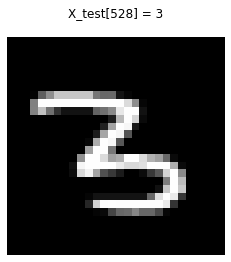

In [94]:
i = np.random.randint(X_test.shape[0])
plt.imshow(X_test[i], cmap='gray')
plt.title(f"X_test[{i}] = {y_test[i]}\n")
plt.axis("off");

In [95]:
mnist.train.num_examples

55000

In [112]:
X_batch, y_batch = mnist.train.next_batch(batch_size)
type(X_batch)

numpy.ndarray

In [113]:
X_batch.shape, X_batch.dtype

((150, 784), dtype('float32'))

In [114]:
y_batch.dtype, y_batch.shape

(dtype('uint8'), (150,))

In [119]:
n_epochs = 100
batch_size = 150
n_iterations = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(n_iterations):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            print(f"epoch={epoch+1}/{n_epochs}, iteration={iteration+1}/{n_iterations}", end="\r")
            # Debug purpose: next line
            #print(f"X_batch.shape, X_batch.dtype = {X_batch.shape, X_batch.dtype}")
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        # The training accuracy is evaluated on the last batch only.
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("(epoch %03d/%03d) acc_train = %.4f  acc_test = %.4f" % (epoch+1, n_epochs, acc_train, acc_test))

(epoch 001/100) acc_train = 0.9467  acc_test = 0.9170
(epoch 002/100) acc_train = 0.9533  acc_test = 0.9428
(epoch 003/100) acc_train = 0.9600  acc_test = 0.9479
(epoch 004/100) acc_train = 0.9800  acc_test = 0.9620
(epoch 005/100) acc_train = 0.9333  acc_test = 0.9550
(epoch 006/100) acc_train = 0.9867  acc_test = 0.9660
(epoch 007/100) acc_train = 0.9800  acc_test = 0.9713
(epoch 008/100) acc_train = 0.9733  acc_test = 0.9643
(epoch 009/100) acc_train = 0.9867  acc_test = 0.9695
(epoch 010/100) acc_train = 0.9933  acc_test = 0.9692
(epoch 011/100) acc_train = 0.9733  acc_test = 0.9711
(epoch 012/100) acc_train = 0.9733  acc_test = 0.9697
(epoch 013/100) acc_train = 0.9867  acc_test = 0.9709
(epoch 014/100) acc_train = 0.9800  acc_test = 0.9739
(epoch 015/100) acc_train = 0.9600  acc_test = 0.9739
(epoch 016/100) acc_train = 0.9933  acc_test = 0.9735
(epoch 017/100) acc_train = 0.9800  acc_test = 0.9738
(epoch 018/100) acc_train = 1.0000  acc_test = 0.9716
(epoch 019/100) acc_train = 